In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# train
VOCAB_SIZE = 3000
EMBEDDING_SIZE = 10
BATCH_SIZE = 8192
EPOCH = 50
WINDOW_SIZE = 1
# display number
DISNUM = 50

# name
name = 'fnn-' + 'epo' + str(EPOCH) + 'ebd' + str(EMBEDDING_SIZE) + 'vcb' + str(VOCAB_SIZE) + 'win' + str(WINDOW_SIZE)

In [2]:
class FNN(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(FNN, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)
    def forward(self, inputs):
        embedding = self.embedding(inputs)
        out = F.relu(self.fc1(embedding))
        out = self.fc2(out)
        return F.log_softmax(out, dim=-1)

In [3]:
# read corpus from file
corpus = []
with open('norvel-cleaned.txt', 'r', encoding='utf-8') as f:
    for line in f:
        corpus.append(line.strip().split(' '))
# build word_to_ix
word_to_ix = {}
for sentence in corpus:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
word_to_ix = {k: v if v < VOCAB_SIZE else VOCAB_SIZE for k, v in word_to_ix.items()}
word_to_ix['<UNK>'] = VOCAB_SIZE

In [4]:
inputs = []
targets = []
for sentence in corpus:
    for i in range(len(sentence)):
        for j in range(-WINDOW_SIZE, WINDOW_SIZE+1):
            if j != 0 and i+j >= 0 and i+j < len(sentence):
                inputs.append(word_to_ix[sentence[i]])
                targets.append(word_to_ix[sentence[i+j]])

# convert to tensor
inputs = torch.tensor(inputs, dtype=torch.long).to(device)
targets = torch.tensor(targets, dtype=torch.long).to(device)

In [5]:
# train model, inputs are single words and targets are their contexts
model = FNN(VOCAB_SIZE+1, EMBEDDING_SIZE, 128)
model.to(device)
loss_function = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(EPOCH):
    total_loss = 0
    for i in tqdm.tqdm(range(0, len(corpus), BATCH_SIZE)):
        input = inputs[i:i+BATCH_SIZE]
        target = targets[i:i+BATCH_SIZE]
        model.zero_grad()
        log_probs = model(input)
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('Epoch:', epoch, 'Loss:', total_loss)
word_vectors = np.array(model.embedding.weight.data.cpu())

100%|██████████| 190/190 [00:03<00:00, 51.71it/s] 


Epoch: 0 Loss: 1090.606381893158


100%|██████████| 190/190 [00:01<00:00, 104.37it/s]


Epoch: 1 Loss: 980.8980102539062


100%|██████████| 190/190 [00:01<00:00, 104.43it/s]


Epoch: 2 Loss: 974.2514562606812


100%|██████████| 190/190 [00:01<00:00, 103.88it/s]


Epoch: 3 Loss: 969.8797888755798


100%|██████████| 190/190 [00:01<00:00, 103.91it/s]


Epoch: 4 Loss: 966.4927802085876


100%|██████████| 190/190 [00:01<00:00, 104.14it/s]


Epoch: 5 Loss: 963.6805047988892


100%|██████████| 190/190 [00:01<00:00, 103.94it/s]


Epoch: 6 Loss: 961.2373523712158


100%|██████████| 190/190 [00:01<00:00, 104.00it/s]


Epoch: 7 Loss: 959.0810389518738


100%|██████████| 190/190 [00:01<00:00, 103.80it/s]


Epoch: 8 Loss: 957.1259388923645


100%|██████████| 190/190 [00:01<00:00, 103.80it/s]


Epoch: 9 Loss: 955.3794450759888


100%|██████████| 190/190 [00:01<00:00, 103.57it/s]


Epoch: 10 Loss: 953.7985262870789


100%|██████████| 190/190 [00:01<00:00, 103.44it/s]


Epoch: 11 Loss: 952.3627119064331


100%|██████████| 190/190 [00:01<00:00, 103.74it/s]


Epoch: 12 Loss: 951.0414419174194


100%|██████████| 190/190 [00:01<00:00, 103.64it/s]


Epoch: 13 Loss: 949.8219771385193


100%|██████████| 190/190 [00:01<00:00, 103.45it/s]


Epoch: 14 Loss: 948.7021570205688


100%|██████████| 190/190 [00:01<00:00, 103.67it/s]


Epoch: 15 Loss: 947.6478681564331


100%|██████████| 190/190 [00:01<00:00, 103.51it/s]


Epoch: 16 Loss: 946.6794781684875


100%|██████████| 190/190 [00:01<00:00, 103.41it/s]


Epoch: 17 Loss: 945.7567410469055


100%|██████████| 190/190 [00:01<00:00, 103.15it/s]


Epoch: 18 Loss: 944.9003701210022


100%|██████████| 190/190 [00:01<00:00, 103.52it/s]


Epoch: 19 Loss: 944.0947914123535


100%|██████████| 190/190 [00:01<00:00, 103.38it/s]


Epoch: 20 Loss: 943.3340005874634


100%|██████████| 190/190 [00:01<00:00, 103.37it/s]


Epoch: 21 Loss: 942.6180601119995


100%|██████████| 190/190 [00:01<00:00, 103.41it/s]


Epoch: 22 Loss: 941.9352869987488


100%|██████████| 190/190 [00:01<00:00, 103.35it/s]


Epoch: 23 Loss: 941.2891798019409


100%|██████████| 190/190 [00:01<00:00, 103.36it/s]


Epoch: 24 Loss: 940.6713285446167


100%|██████████| 190/190 [00:01<00:00, 103.07it/s]


Epoch: 25 Loss: 940.0932245254517


100%|██████████| 190/190 [00:01<00:00, 103.28it/s]


Epoch: 26 Loss: 939.5279002189636


100%|██████████| 190/190 [00:01<00:00, 102.98it/s]


Epoch: 27 Loss: 938.9949660301208


100%|██████████| 190/190 [00:01<00:00, 103.01it/s]


Epoch: 28 Loss: 938.4759330749512


100%|██████████| 190/190 [00:01<00:00, 103.63it/s]


Epoch: 29 Loss: 937.9841585159302


100%|██████████| 190/190 [00:01<00:00, 103.06it/s]


Epoch: 30 Loss: 937.5213956832886


100%|██████████| 190/190 [00:01<00:00, 102.79it/s]


Epoch: 31 Loss: 937.0715870857239


100%|██████████| 190/190 [00:01<00:00, 102.56it/s]


Epoch: 32 Loss: 936.6344566345215


100%|██████████| 190/190 [00:01<00:00, 102.62it/s]


Epoch: 33 Loss: 936.2184357643127


100%|██████████| 190/190 [00:01<00:00, 102.68it/s]


Epoch: 34 Loss: 935.8192076683044


100%|██████████| 190/190 [00:01<00:00, 102.07it/s]


Epoch: 35 Loss: 935.4278712272644


100%|██████████| 190/190 [00:01<00:00, 100.51it/s]


Epoch: 36 Loss: 935.0492939949036


100%|██████████| 190/190 [00:01<00:00, 100.02it/s]


Epoch: 37 Loss: 934.6843194961548


100%|██████████| 190/190 [00:01<00:00, 99.24it/s] 


Epoch: 38 Loss: 934.329607963562


100%|██████████| 190/190 [00:01<00:00, 102.62it/s]


Epoch: 39 Loss: 933.9845204353333


100%|██████████| 190/190 [00:01<00:00, 102.73it/s]


Epoch: 40 Loss: 933.6531267166138


100%|██████████| 190/190 [00:01<00:00, 102.95it/s]


Epoch: 41 Loss: 933.3300766944885


100%|██████████| 190/190 [00:01<00:00, 102.51it/s]


Epoch: 42 Loss: 933.0108828544617


100%|██████████| 190/190 [00:01<00:00, 100.39it/s]


Epoch: 43 Loss: 932.7029671669006


100%|██████████| 190/190 [00:01<00:00, 98.83it/s] 


Epoch: 44 Loss: 932.4047231674194


100%|██████████| 190/190 [00:01<00:00, 102.18it/s]


Epoch: 45 Loss: 932.1087193489075


100%|██████████| 190/190 [00:01<00:00, 102.57it/s]


Epoch: 46 Loss: 931.8240342140198


100%|██████████| 190/190 [00:01<00:00, 102.30it/s]


Epoch: 47 Loss: 931.5453586578369


100%|██████████| 190/190 [00:01<00:00, 102.18it/s]


Epoch: 48 Loss: 931.2695956230164


100%|██████████| 190/190 [00:01<00:00, 102.39it/s]


Epoch: 49 Loss: 931.0147171020508


100%|██████████| 190/190 [00:01<00:00, 101.69it/s]


Epoch: 50 Loss: 930.7510600090027


100%|██████████| 190/190 [00:01<00:00, 101.64it/s]


Epoch: 51 Loss: 930.5027656555176


100%|██████████| 190/190 [00:01<00:00, 100.97it/s]


Epoch: 52 Loss: 930.2483491897583


100%|██████████| 190/190 [00:01<00:00, 100.99it/s]


Epoch: 53 Loss: 930.0088987350464


100%|██████████| 190/190 [00:01<00:00, 100.05it/s]


Epoch: 54 Loss: 929.7723107337952


100%|██████████| 190/190 [00:01<00:00, 98.02it/s]


Epoch: 55 Loss: 929.5358600616455


100%|██████████| 190/190 [00:01<00:00, 99.14it/s]


Epoch: 56 Loss: 929.3078618049622


100%|██████████| 190/190 [00:01<00:00, 100.29it/s]


Epoch: 57 Loss: 929.0895676612854


100%|██████████| 190/190 [00:01<00:00, 100.93it/s]


Epoch: 58 Loss: 928.8672728538513


100%|██████████| 190/190 [00:01<00:00, 99.92it/s] 


Epoch: 59 Loss: 928.6514410972595


100%|██████████| 190/190 [00:01<00:00, 100.56it/s]


Epoch: 60 Loss: 928.4504947662354


100%|██████████| 190/190 [00:01<00:00, 101.76it/s]


Epoch: 61 Loss: 928.2375168800354


100%|██████████| 190/190 [00:01<00:00, 102.30it/s]


Epoch: 62 Loss: 928.0372824668884


100%|██████████| 190/190 [00:01<00:00, 102.34it/s]


Epoch: 63 Loss: 927.8384189605713


100%|██████████| 190/190 [00:01<00:00, 102.58it/s]


Epoch: 64 Loss: 927.6443495750427


100%|██████████| 190/190 [00:01<00:00, 102.29it/s]


Epoch: 65 Loss: 927.4470539093018


100%|██████████| 190/190 [00:01<00:00, 102.62it/s]


Epoch: 66 Loss: 927.2663245201111


100%|██████████| 190/190 [00:01<00:00, 102.81it/s]


Epoch: 67 Loss: 927.0765318870544


100%|██████████| 190/190 [00:01<00:00, 102.66it/s]


Epoch: 68 Loss: 926.8955488204956


100%|██████████| 190/190 [00:01<00:00, 102.34it/s]


Epoch: 69 Loss: 926.7182245254517


100%|██████████| 190/190 [00:01<00:00, 102.56it/s]


Epoch: 70 Loss: 926.5404324531555


100%|██████████| 190/190 [00:01<00:00, 102.38it/s]


Epoch: 71 Loss: 926.3734488487244


100%|██████████| 190/190 [00:01<00:00, 102.40it/s]


Epoch: 72 Loss: 926.1974229812622


100%|██████████| 190/190 [00:01<00:00, 102.30it/s]


Epoch: 73 Loss: 926.0397629737854


100%|██████████| 190/190 [00:01<00:00, 102.35it/s]


Epoch: 74 Loss: 925.8705811500549


100%|██████████| 190/190 [00:01<00:00, 102.75it/s]


Epoch: 75 Loss: 925.7043061256409


100%|██████████| 190/190 [00:01<00:00, 102.53it/s]


Epoch: 76 Loss: 925.5539708137512


100%|██████████| 190/190 [00:01<00:00, 102.45it/s]


Epoch: 77 Loss: 925.393961429596


100%|██████████| 190/190 [00:01<00:00, 103.00it/s]


Epoch: 78 Loss: 925.239284992218


100%|██████████| 190/190 [00:01<00:00, 102.83it/s]


Epoch: 79 Loss: 925.0847206115723


100%|██████████| 190/190 [00:01<00:00, 102.73it/s]


Epoch: 80 Loss: 924.9357266426086


100%|██████████| 190/190 [00:01<00:00, 102.27it/s]


Epoch: 81 Loss: 924.7876763343811


100%|██████████| 190/190 [00:01<00:00, 102.18it/s]


Epoch: 82 Loss: 924.644926071167


100%|██████████| 190/190 [00:01<00:00, 102.56it/s]


Epoch: 83 Loss: 924.4957633018494


100%|██████████| 190/190 [00:01<00:00, 102.78it/s]


Epoch: 84 Loss: 924.3542761802673


100%|██████████| 190/190 [00:01<00:00, 102.96it/s]


Epoch: 85 Loss: 924.2112884521484


100%|██████████| 190/190 [00:01<00:00, 103.05it/s]


Epoch: 86 Loss: 924.0724105834961


100%|██████████| 190/190 [00:01<00:00, 103.35it/s]


Epoch: 87 Loss: 923.9387216567993


100%|██████████| 190/190 [00:01<00:00, 102.44it/s]


Epoch: 88 Loss: 923.8067746162415


100%|██████████| 190/190 [00:01<00:00, 102.23it/s]


Epoch: 89 Loss: 923.6691012382507


100%|██████████| 190/190 [00:01<00:00, 102.41it/s]


Epoch: 90 Loss: 923.5413045883179


100%|██████████| 190/190 [00:01<00:00, 102.67it/s]


Epoch: 91 Loss: 923.4120221138


100%|██████████| 190/190 [00:01<00:00, 102.44it/s]


Epoch: 92 Loss: 923.285623550415


100%|██████████| 190/190 [00:01<00:00, 102.44it/s]


Epoch: 93 Loss: 923.153920173645


100%|██████████| 190/190 [00:01<00:00, 102.57it/s]


Epoch: 94 Loss: 923.0350456237793


100%|██████████| 190/190 [00:01<00:00, 102.40it/s]


Epoch: 95 Loss: 922.9129161834717


100%|██████████| 190/190 [00:01<00:00, 102.39it/s]


Epoch: 96 Loss: 922.7960615158081


100%|██████████| 190/190 [00:01<00:00, 102.52it/s]


Epoch: 97 Loss: 922.6673173904419


100%|██████████| 190/190 [00:01<00:00, 102.49it/s]


Epoch: 98 Loss: 922.553858757019


100%|██████████| 190/190 [00:01<00:00, 102.45it/s]

Epoch: 99 Loss: 922.432056427002


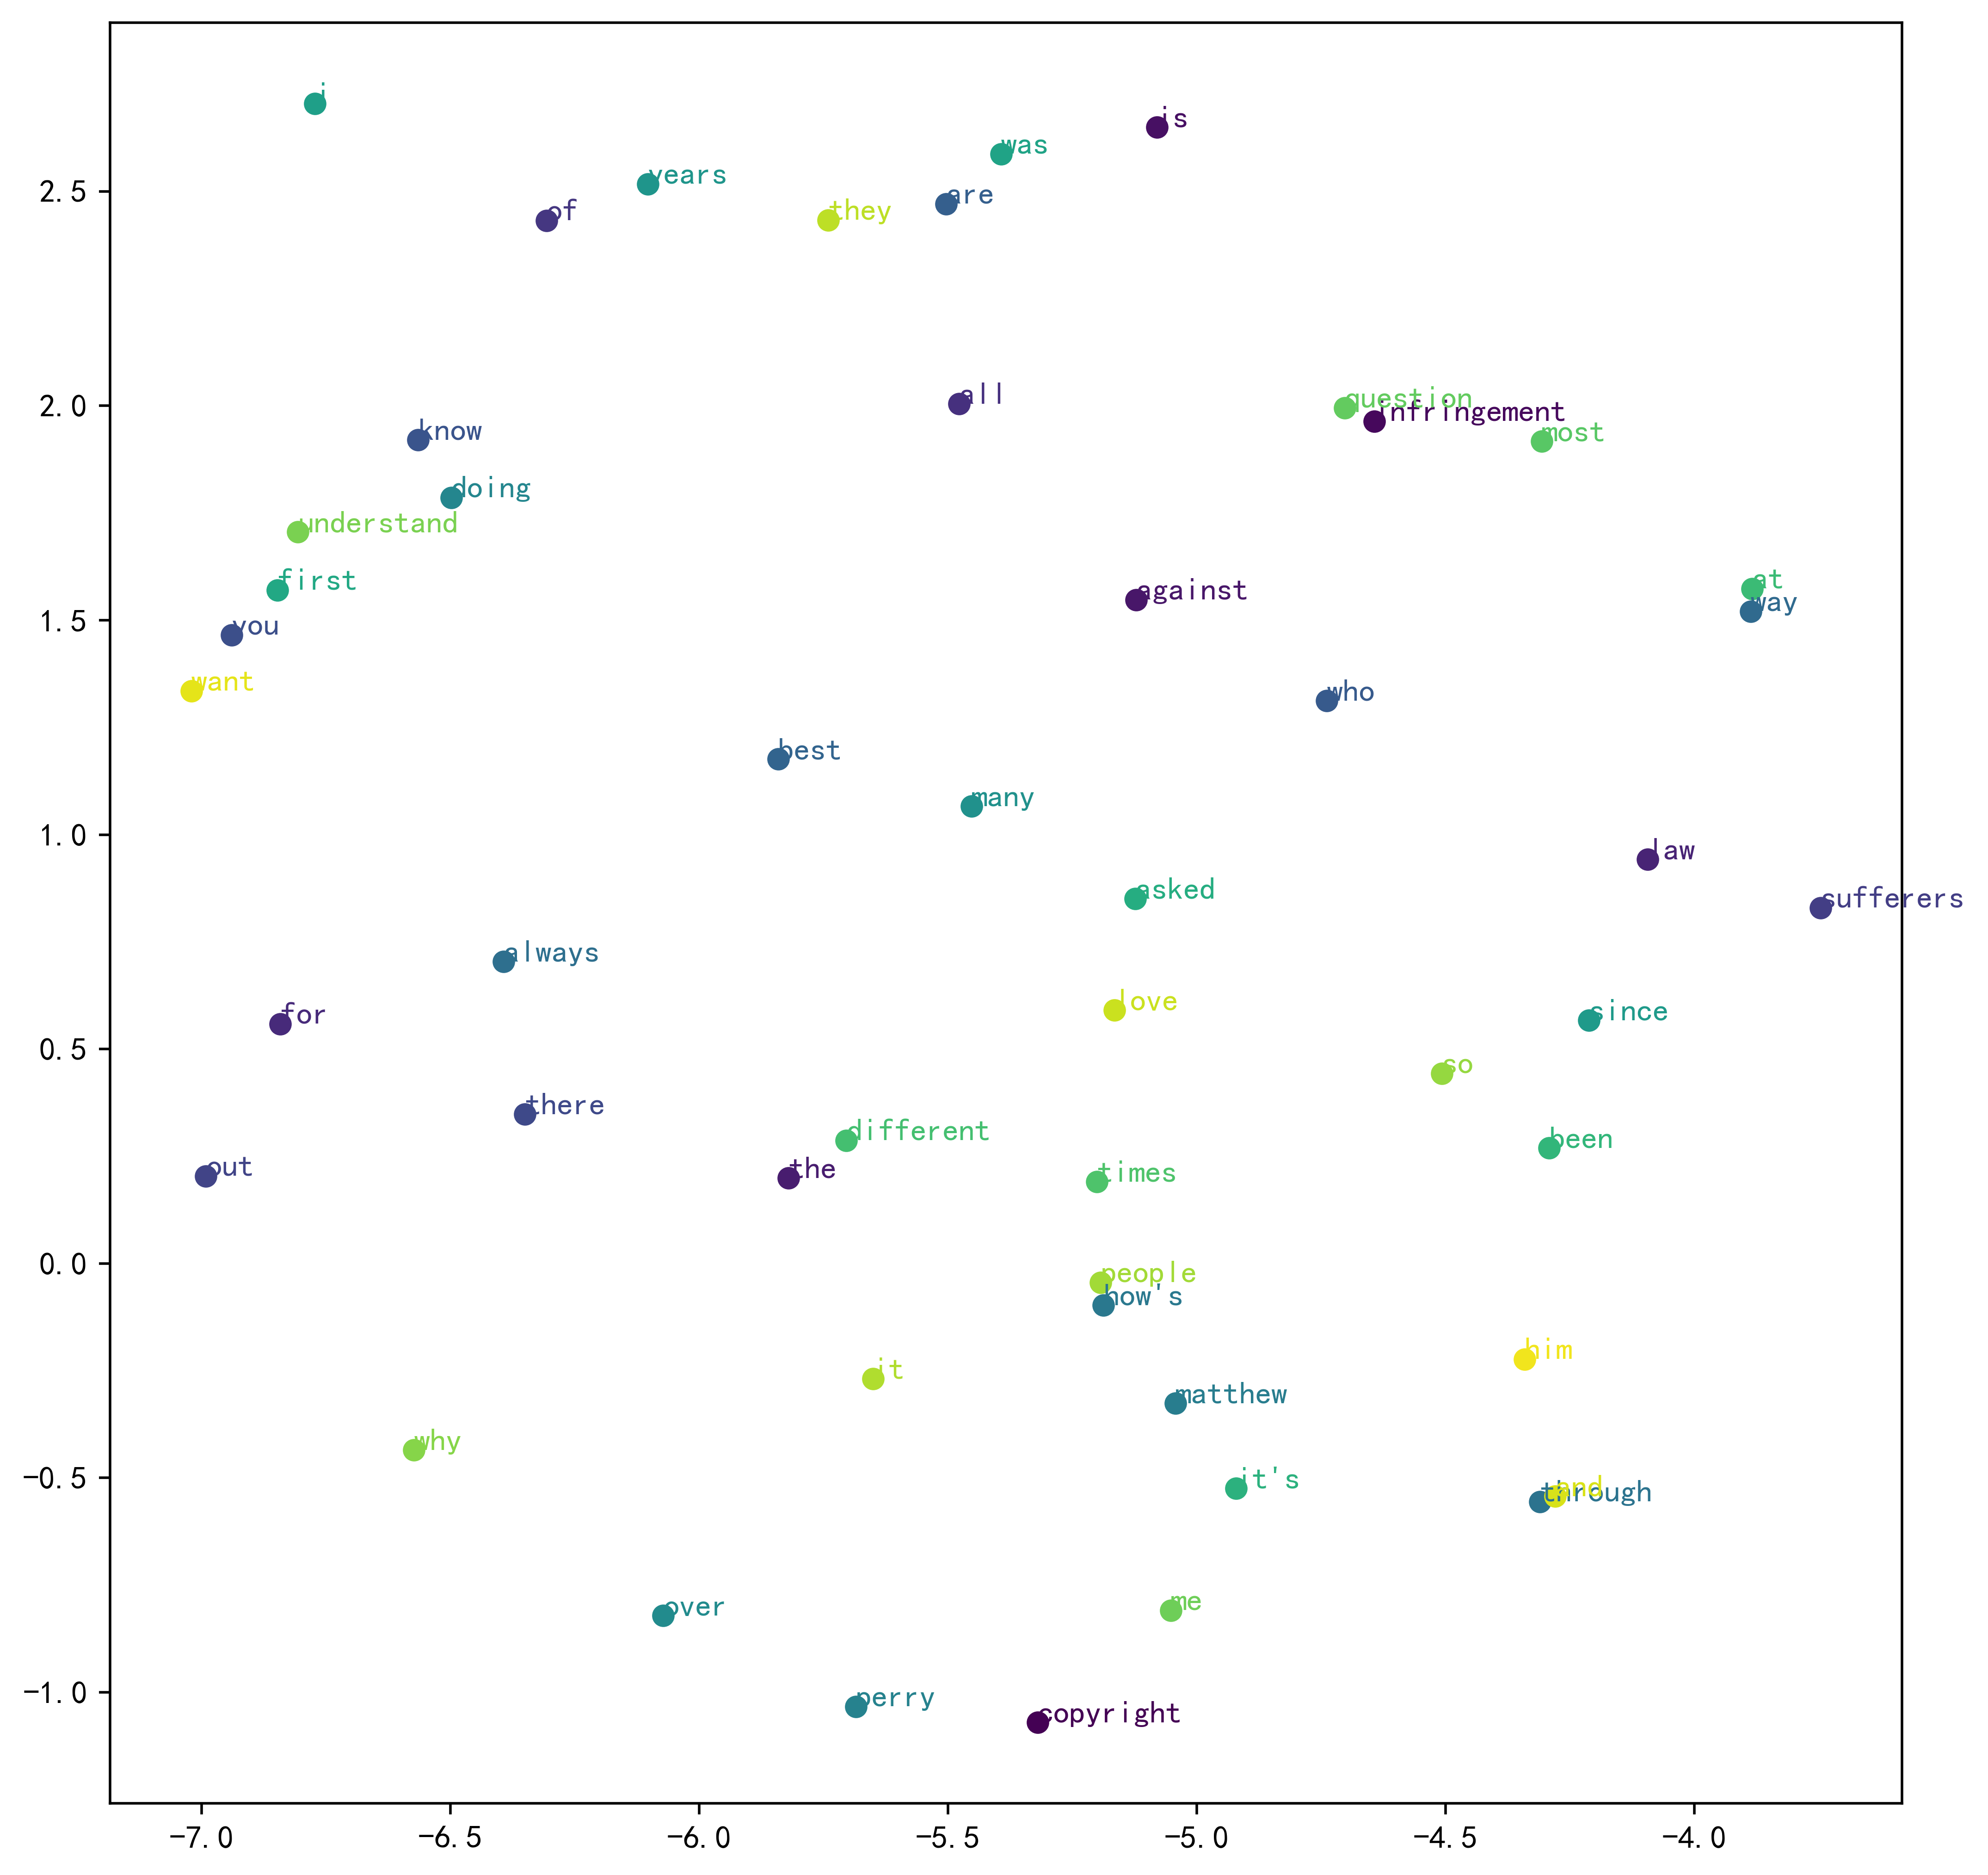

In [6]:
# tsne
tsne = TSNE(n_components=2, random_state=0)
word_vectors_tsne = tsne.fit_transform(word_vectors[:DISNUM])

# plot
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)

cmap = plt.get_cmap('viridis')
# cmap = plt.get_cmap('tab10')
for i, word in enumerate(word_to_ix):
    if i == DISNUM:
        break
    color = cmap(i/DISNUM)
    ax.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1], color=color)
    ax.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), color=color)
plt.savefig(name + '.png')
torch.save(model.state_dict(), name + '.pth')

In [7]:
import pandas as pd
import os
word_list = list(word_to_ix.keys())[::10][:20]
# get similar words using cosine similarity
def get_similar_words(word, n=10):
    if word not in word_to_ix:
        print('Word not in vocabulary')
        return
    word_vector = word_vectors[word_to_ix[word]]
    similarities = np.dot(word_vectors, word_vector) / (np.linalg.norm(word_vectors, axis=1) * np.linalg.norm(word_vector))
    sorted_indices = np.argsort(similarities)[::-1][1:n+1]
    similar_words = []
    similarity_scores = []
    for i in sorted_indices:
        similar_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(i)]
        similarity = similarities[i]
        similar_words.append(similar_word)
        similarity_scores.append(similarity)
    df = pd.DataFrame({'Similar Words': similar_words, 'Similarity Scores': similarity_scores})
    if not os.path.exists(name):
        os.makedirs(name)
    df.to_excel(f'{name}/{name}_{word}.xlsx', index=False)
for word in word_list:
    get_similar_words(word)